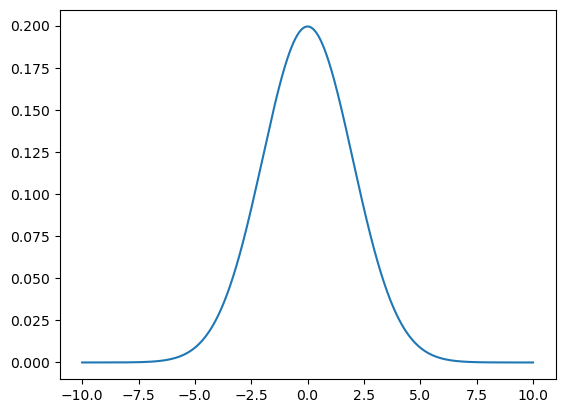

In [6]:
import numpy as np
import matplotlib.pyplot as plt

A = 0.446
sigma = 2
mew = 0
f = lambda x: (1/(sigma*((2*math.pi)**0.5)))*np.exp(-((x-mew)**2)/(2*(sigma**2)))

x_val = np.linspace(-10, 10, 1000)
y_val = f(x_val)
plt.plot(x_val, y_val)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import sys


def get_random_zero_or_one():
    return np.random.randint(0, 2)

def get_random_negative_positive_one():
    # returns either -1 or +1
    return (np.random.randint(0, 2) * -2) + 1

simulations_to_run = 100
steps_to_do = 1000

# correct initialization (no shared inner lists)
positions_x = [[0 for _ in range(simulations_to_run)] for _ in range(steps_to_do)]
positions_y = [[0 for _ in range(simulations_to_run)] for _ in range(steps_to_do)]

# run random walk: each step move either in x or y by ±1
for step in range(steps_to_do - 1):
    for sim in range(simulations_to_run):
        # start from previous position
        x_prev = positions_x[step][sim]
        y_prev = positions_y[step][sim]

        if get_random_zero_or_one() == 0:
            # move in x
            dx = get_random_negative_positive_one()
            dy = 0
        else:
            # move in y
            dx = 0
            dy = get_random_negative_positive_one()

        positions_x[step + 1][sim] = x_prev + dx
        positions_y[step + 1][sim] = y_prev + dy

print("Finished simulation. Starting animation...")

limit = int(steps_to_do / 20)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_ylim(-limit, limit)
ax.set_xlim(-limit, limit)

# initial scatter; note this returns a PathCollection
campo = ax.scatter([], [])

def init():
    # initialize with empty offsets
    campo.set_offsets(np.empty((0, 2)))
    return (campo,)

def animate(i):
    sys.stdout.write("\r")
    sys.stdout.write(str(int(100*(i/steps_to_do))) + "%")
    sys.stdout.flush()
    xs = positions_x[i]
    ys = positions_y[i]
    # set_offsets expects an (N,2) array
    coords = np.column_stack((xs, ys))
    campo.set_offsets(coords)
    return (campo,)

# create animation
anim = animation.FuncAnimation(
    fig,
    animate,
    init_func=init,
    frames=steps_to_do,
    interval=20,
    blit=True
)

HTML(anim.to_jshtml())